<a href="https://colab.research.google.com/github/CarlosZ1234/SSF-Oto24-Carlos-Daniel-Zu-iga-Alvarez/blob/main/t4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

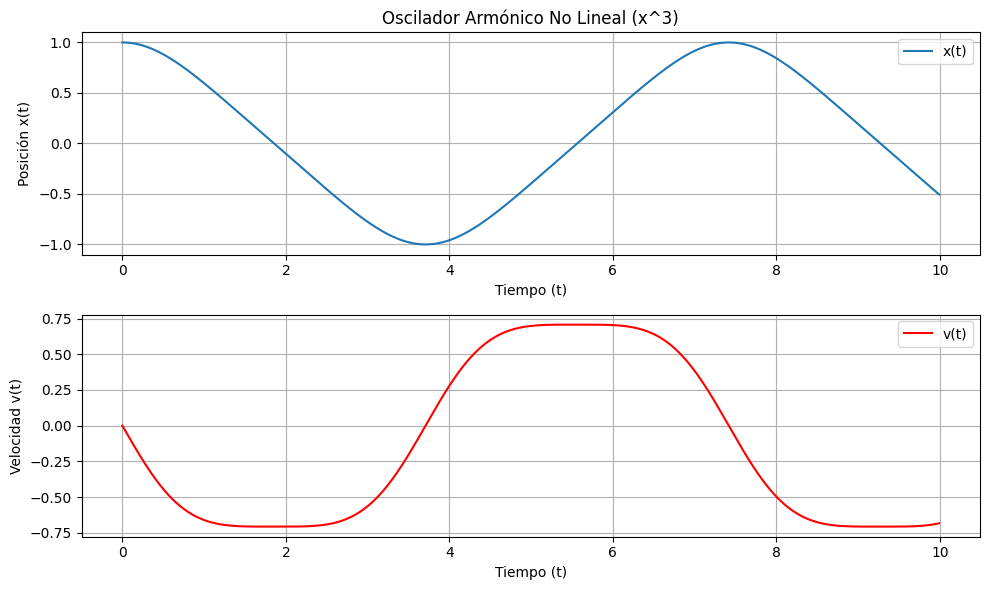

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función que describe el sistema de ecuaciones diferenciales
def system(t, y):
    x, v = y  # y[0] es x(t), y[1] es v(t) = dx/dt
    dxdt = v
    dvdt = -x**3  # Ecuación no lineal: -x^3
    return np.array([dxdt, dvdt])

# Método de Runge-Kutta de 4° orden
def runge_kutta_4(func, y0, t0, tf, dt):
    t_values = np.arange(t0, tf, dt)  # Crear el vector de tiempo
    n_steps = len(t_values)  # Número de pasos
    y_values = np.zeros((n_steps, len(y0)))  # Crear el array para almacenar las soluciones
    y_values[0] = y0  # Condiciones iniciales

    for i in range(1, n_steps):
        t = t_values[i-1]
        y = y_values[i-1]

        k1 = dt * func(t, y)
        k2 = dt * func(t + 0.5*dt, y + 0.5*k1)
        k3 = dt * func(t + 0.5*dt, y + 0.5*k2)
        k4 = dt * func(t + dt, y + k3)

        y_values[i] = y + (k1 + 2*k2 + 2*k3 + k4) / 6  # Fórmula de Runge-Kutta

    return t_values, y_values

# Parámetros de la simulación
y0 = [1.0, 0.0]  # Condiciones iniciales: x(0) = 1, v(0) = 0
t0 = 0.0         # Tiempo inicial
tf = 10.0        # Tiempo final
dt = 0.01        # Paso de tiempo

# Resolver el sistema de ecuaciones
t_values, y_values = runge_kutta_4(system, y0, t0, tf, dt)

# Extraer las soluciones
x_values = y_values[:, 0]
v_values = y_values[:, 1]

# Graficar la solución
plt.figure(figsize=(10, 6))

# Graficar la posición x(t) y la velocidad v(t)
plt.subplot(2, 1, 1)
plt.plot(t_values, x_values, label="x(t)")
plt.title("Oscilador Armónico No Lineal (x^3)")
plt.xlabel("Tiempo (t)")
plt.ylabel("Posición x(t)")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_values, v_values, label="v(t)", color='r')
plt.xlabel("Tiempo (t)")
plt.ylabel("Velocidad v(t)")
plt.grid(True)
plt.legend()

# Mostrar las gráficas
plt.tight_layout()
plt.show()



Simulación con k=0.5, dt=0.01, n_steps=1000


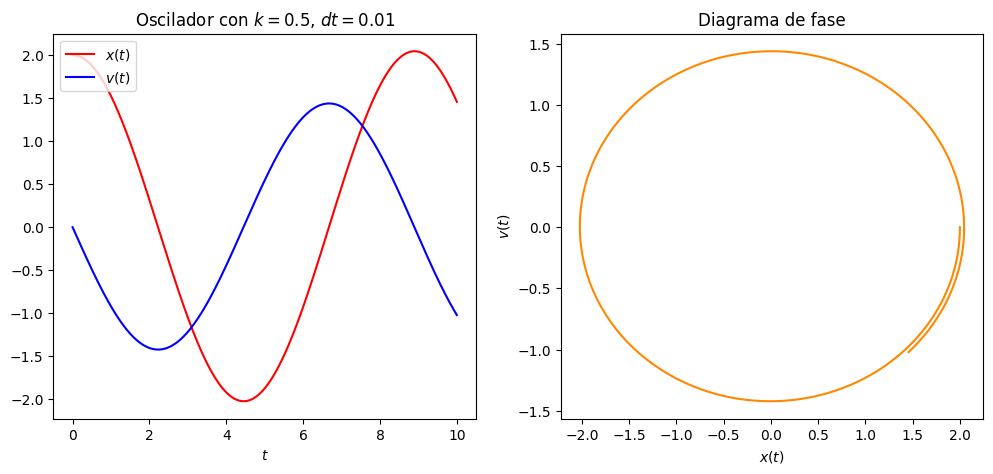

Simulación con k=0.5, dt=0.05, n_steps=1000


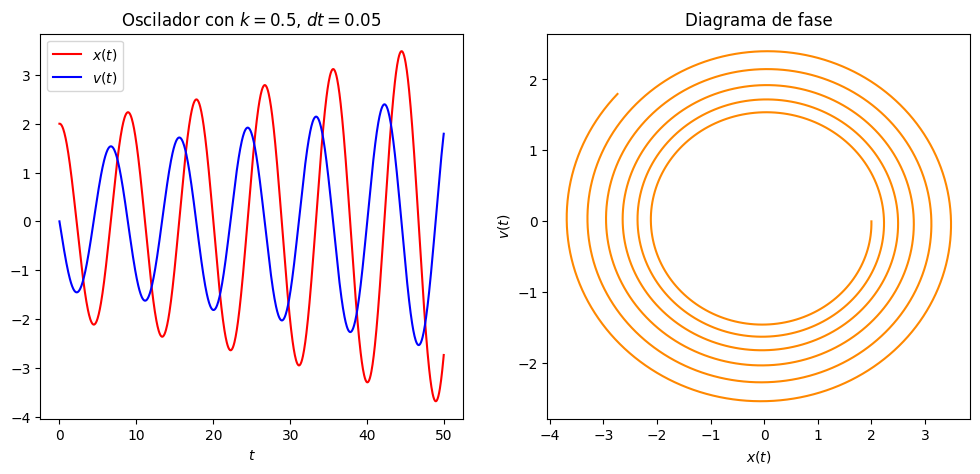

Simulación con k=10, dt=0.01, n_steps=1000


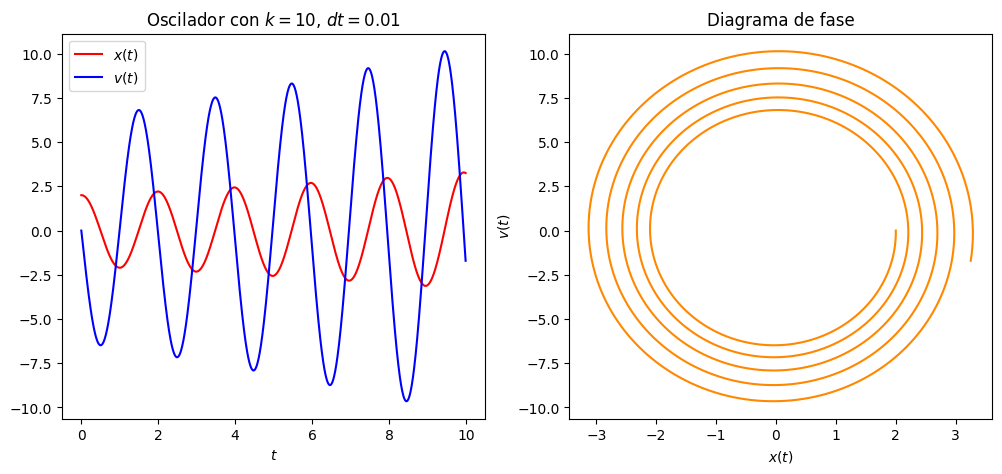

Simulación con k=10, dt=0.05, n_steps=1000


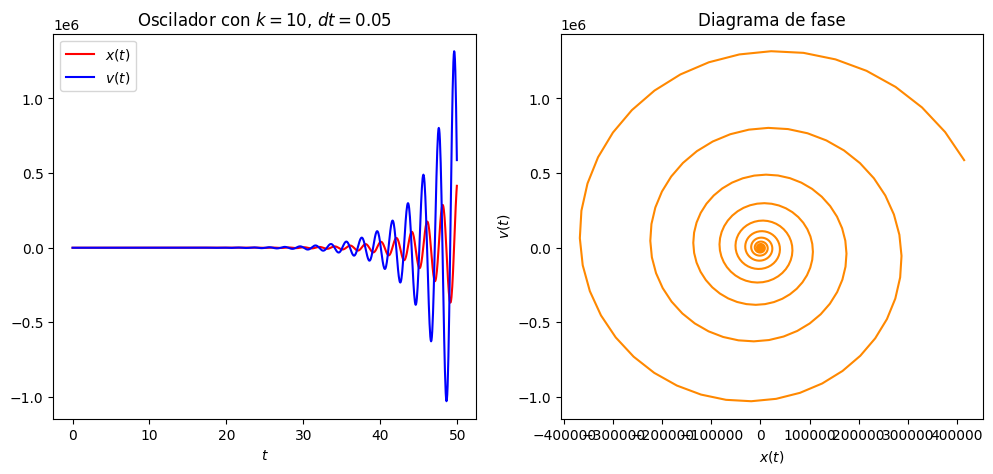

Simulación con k=50, dt=0.01, n_steps=1000


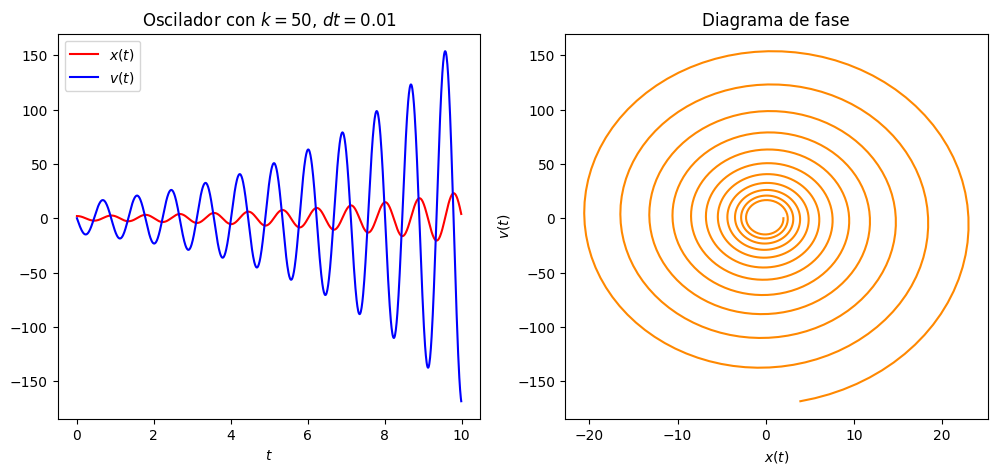

Simulación con k=50, dt=0.05, n_steps=1000


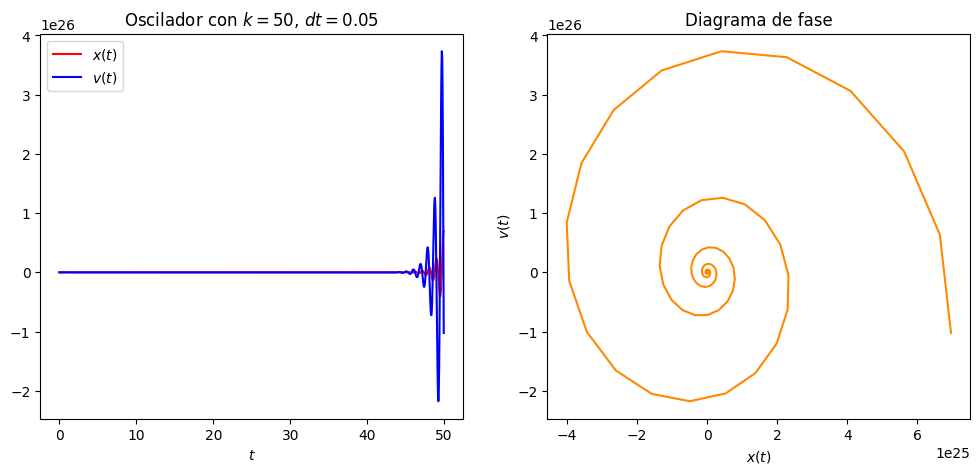

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la ecuación diferencial para el oscilador armónico
def harmonic_eq(x, t, k):
    return x[1], -k * x[0]

# Método de Euler para resolver el sistema
def euler_2var(x, func, t, k, dt):
    y = func(x, t, k)
    return x[0] + dt * y[0], x[1] + dt * y[1]

# Función para calcular y graficar resultados
def calc_plot2var(method, equation, k, dt, n_steps):
    t = np.arange(0, n_steps * dt, dt)  # Vector de tiempo
    x = np.zeros((n_steps, 2))  # Inicializar matriz de resultados
    x[0][0] = 2.0  # Posición inicial

    # Iterar usando el método numérico
    for i in range(n_steps - 1):
        x[i + 1] = method(x[i], harmonic_eq, t[i], k, dt)

    # Graficar posición y velocidad en el tiempo
    fig = plt.figure(figsize=(12, 5))
    axes = fig.add_subplot(1, 2, 1)
    axes.plot(t, x[:, 0], 'r', label="$x(t)$")  # Posición
    axes.plot(t, x[:, 1], 'b', label="$v(t)$")  # Velocidad
    axes.set_xlabel("$t$")
    axes.set_title(f"Oscilador con $k={k}$, $dt={dt}$")
    plt.legend(loc='upper left')

    # Graficar diagrama de fase
    axes = fig.add_subplot(1, 2, 2)
    axes.plot(x[:, 0], x[:, 1], '#ff8800')
    axes.set_xlabel("$x(t)$")
    axes.set_ylabel("$v(t)$")
    axes.set_title("Diagrama de fase")
    plt.show()

# Parámetros de la tarea
k_values = [0.5, 10, 50]  # Valores representativos de k
dt_values = [0.01, 0.05]  # Tamaños de paso representativos
n_steps = 1000  # Fijar un número de pasos para consistencia

# Ejecutar simulaciones para los valores seleccionados de k y dt
if __name__ == "__main__":
    for k in k_values:
        for dt in dt_values:
            print(f"Simulación con k={k}, dt={dt}, n_steps={n_steps}")
            calc_plot2var(euler_2var, harmonic_eq, k, dt, n_steps)
